# Lab-13 : Simon's Algorithm

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit import ClassicalRegister

from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import numpy as np


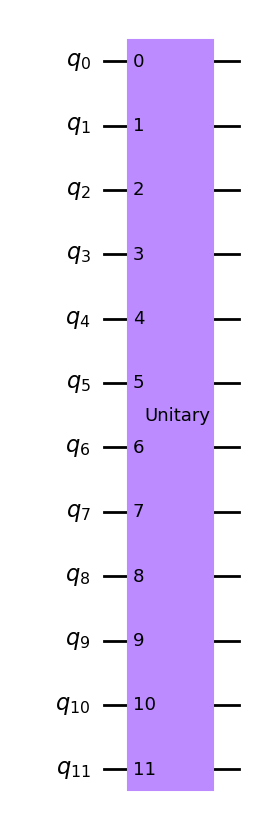

In [7]:

def simon_circuit(s: str):
    """
    Create a QuantumCircuit to query gate for Simon problem obeying the promise for the hidden string `s`
    """
    # QuantumCircuit with 2N Qubits
    N = len(s)
    qc = QuantumCircuit(2*N)
    
    # Define a random permutation of all n bit strings.
    pi = np.random.permutation(2**N)
    
    query_gate = np.zeros((4**N,4**N))
    for x in range(2**N):
        for y in range(2**N):              
            z = y ^ pi[min(x,x ^ int(s,2))]
            query_gate[x + 2**N *z, x + 2**N *y] = 1        

    # add quary gate to our circuit
    qc.unitary(query_gate,range(2*N))
    return qc

s = '101001'
simon_circuit(s).draw(output='mpl')

In [13]:
def simon_measurements(problem: QuantumCircuit, k: int):
    """
    Quantum part of Simon's algorithm. Given a `QuantumCircuit` that
    implements f, get `k` measurements to be post-processed later.
    """
    N = problem.num_qubits // 2

    qc = QuantumCircuit(2*N,N)
    qc.h(range(N))
    qc.compose(problem, inplace=True)
    qc.h(range(N))
    qc.measure(range(N), range(N))
    
    result = AerSimulator().run(qc,shots=k,memory=True).result()
    return result.get_memory()

In [17]:
s = '101001'
display("measurement result  of the string : 101001")
simon_measurements(simon_circuit(s), k = 16)

'measurement result  of the string : 101001'

['011111',
 '000110',
 '010100',
 '100001',
 '111110',
 '111010',
 '011101',
 '111000',
 '010110',
 '011111',
 '010010',
 '100001',
 '111010',
 '000010',
 '110001',
 '110101']

In [21]:
results = AerSimulator.run(simon_circuit(s)).result()
counts = results.get_counts()
plot_histogram(counts)

TypeError: AerBackend.run() missing 1 required positional argument: 'circuits'